<a href="https://colab.research.google.com/github/deborammartins/Bootcamp_Desafios/blob/main/Explorando_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importações**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ranksums

## Dados

In [ ]:
dados = pd.read_csv('tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

In [ ]:
gorjetas = pd.DataFrame(dados.rename(columns = renomear))
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

## Análise 1 - Valor da conta e gorjeta

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

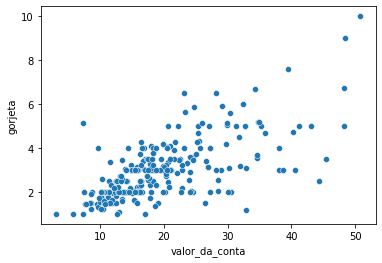

In [ ]:
grafico_conta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
grafico_conta

Visualmente, aumentando o valor da conta, aumentamos o valor da gorjeta.

In [ ]:
gorjetas.count() #Não contém dados nulos

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo %

In [ ]:
gorjetas['%'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,%
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.203927
240,27.18,2.00,Sim,Sábado,Jantar,2,0.073584
241,22.67,2.00,Sim,Sábado,Jantar,2,0.088222
242,17.82,1.75,Não,Sábado,Jantar,2,0.098204


In [ ]:
gorjetas['%'] = gorjetas['%'].round(2)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,%
0,16.99,1.01,Não,Domingo,Dinner,2,0.06
1,10.34,1.66,Não,Domingo,Dinner,3,0.16
2,21.01,3.50,Não,Domingo,Dinner,3,0.17
3,23.68,3.31,Não,Domingo,Dinner,2,0.14
4,24.59,3.61,Não,Domingo,Dinner,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3,0.20
240,27.18,2.00,Sim,Sábado,Dinner,2,0.07
241,22.67,2.00,Sim,Sábado,Dinner,2,0.09
242,17.82,1.75,Não,Sábado,Dinner,2,0.10


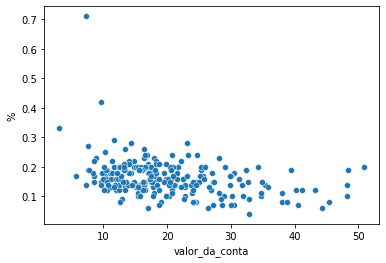

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='%', data=gorjetas)


Visualmente, o valor da conta não é proporcional ao valor da gorjeta.

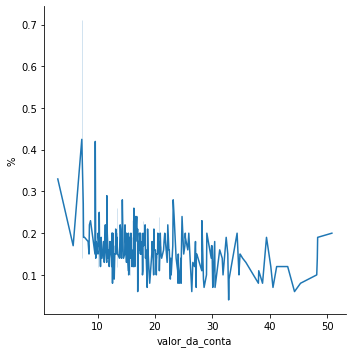

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='%', data=gorjetas, kind='line')

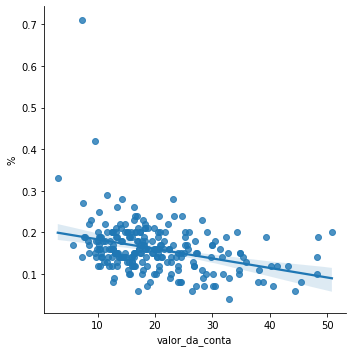

In [ ]:
sns.lmplot(x='valor_da_conta', y='%', data=gorjetas)

## Análise 2 - Sobremesa

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,%
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,%
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


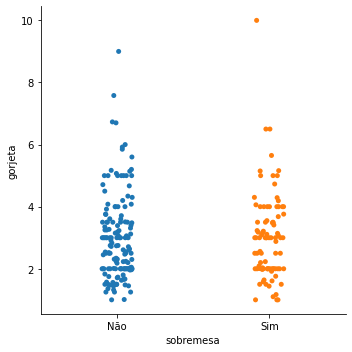

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

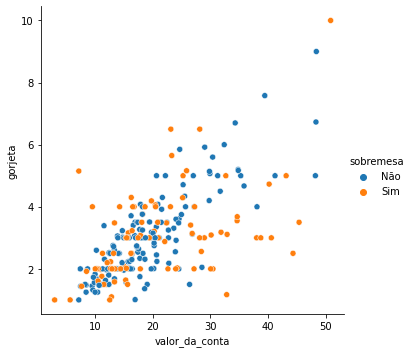

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

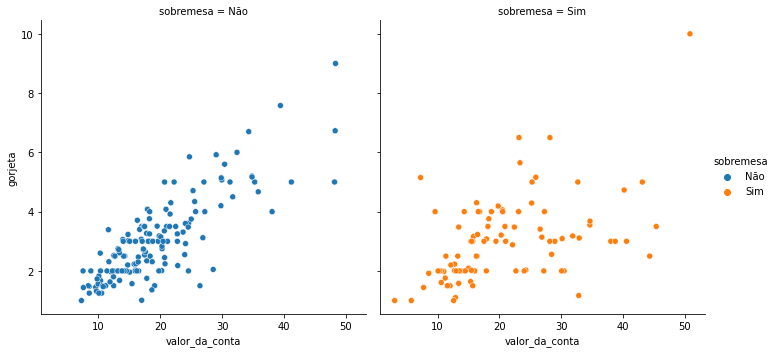

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

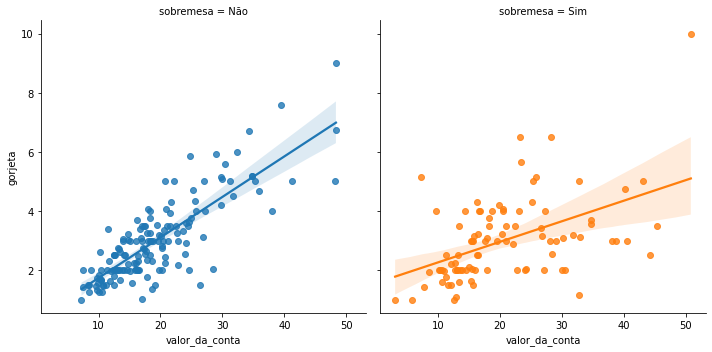

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

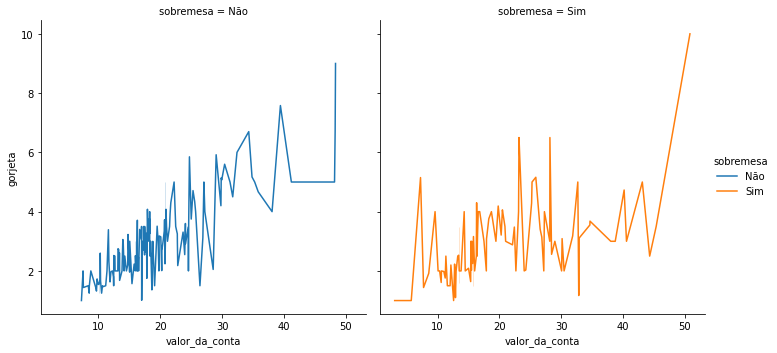

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line',data=gorjetas)

Visualmente, existe uma diferença no valor da gorjeta daqueles clientes que pediram sobremesa e dos que não pediram.

### Teste de Hipótese

**H0: A distribuição da taxa da gorjeta é a mesma nos dois grupos**
negrito
**H1: A distribuição da taxa da gorjeta NÃO É a mesma nos dois grupos**

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'")['%']

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'")['%']

In [ ]:
t, p_valor = ranksums(sobremesa, sem_sobremesa)
p_valor

0.5266635660124415

Neste caso, para rejeitarmos H0, precisariamos obter um p_valor <= 0.05. Logo, Não rejeitamos H0.

## Análise 3 - Dias da Semana

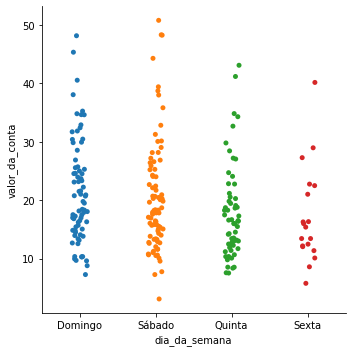

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

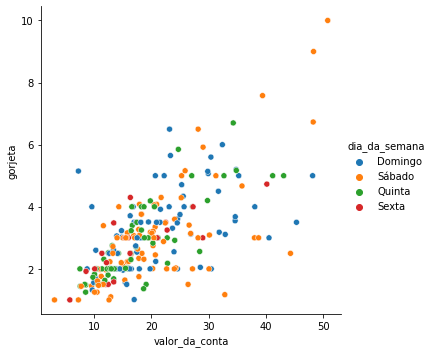

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

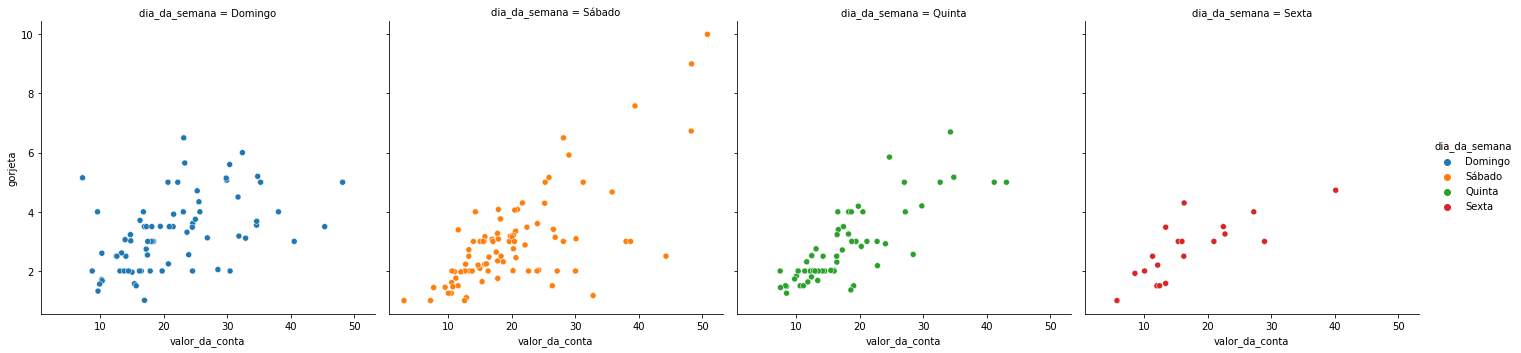

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

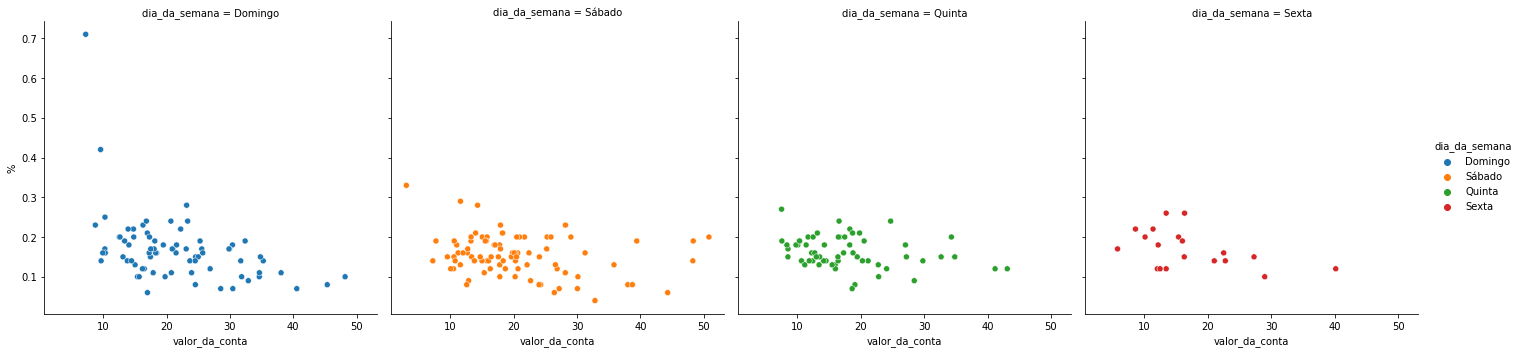

In [ ]:
sns.relplot(x='valor_da_conta', y='%', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

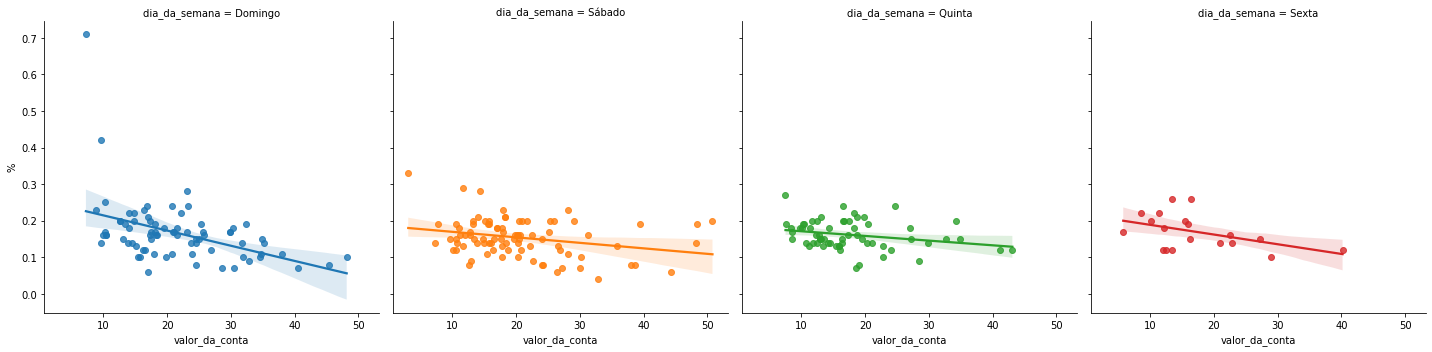

In [ ]:
sns.lmplot(x='valor_da_conta', y='%', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
media_geral_gorjetas

2.99827868852459

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', '%']].round(2)

,valor_da_conta,gorjeta,%
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


In [ ]:
print('Frequência dos Dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos Dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de Hipótese

**H0: A distribuição do valor da conta é igual no Sábado e no Domingo**

**H1: A distribuição do valor da conta NÃO É igual no Sábado e no Domingo**



In [ ]:
valor_conta_dom = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sab = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [ ]:
t, p_valor = ranksums(valor_conta_dom, valor_conta_sab)
p_valor

0.3576728477868443

Não rejeitamos H0, ou seja, a distribuição do valor da conta é igual no sábado e no domingo.

## Análise 4 - Hora do dia

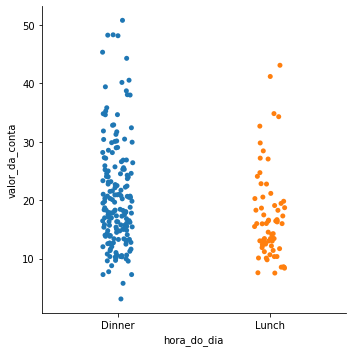

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

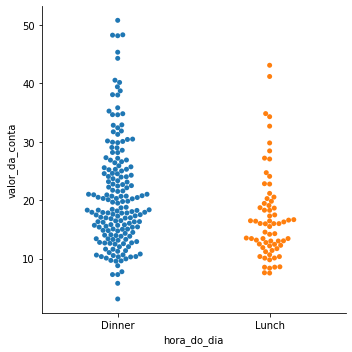

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

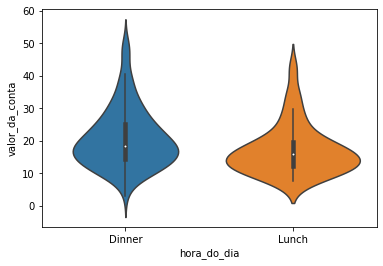

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

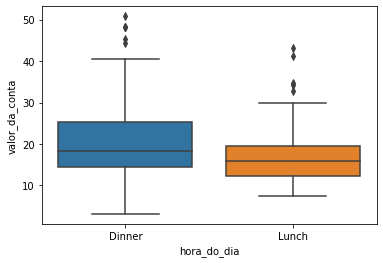

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'")['valor_da_conta']
jantar = gorjetas.query("hora_do_dia == 'Jantar'")['valor_da_conta']


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

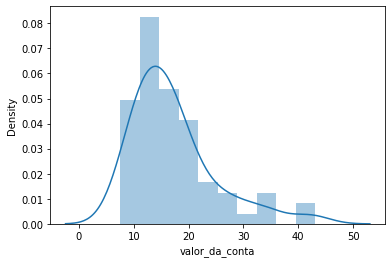

In [ ]:
sns.distplot(almoco)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

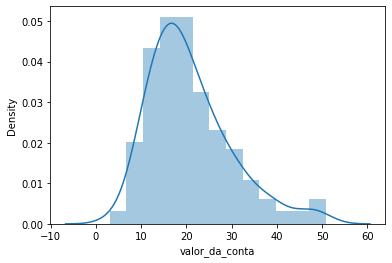

In [ ]:
sns.distplot(jantar)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', '%']].round(2)

,valor_da_conta,gorjeta,%
hora_do_dia,,,
Almoço,17.17,2.73,0.16
Jantar,20.80,3.10,0.16


### Teste de Hipótese

**H0: A distribuição do valor da conta é igual no jantar e no almoço**

**H1: A distribuição do valor da conta NÃO É igual no jantar e no almoço**

In [ ]:
t, p_valor = ranksums(jantar, almoco)
p_valor

0.0011791039723641672

Rejeitamos H0, ou seja, o valor da conta não é igual no jantar e no almoço

### Teste de Hipótese - porcentagem

**H0: A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H1: A distribuição da taxa da gorjeta NÃO É igual no jantar e no almoço**

In [ ]:
porc_almoco = gorjetas.query("hora_do_dia == 'Almoço'")['%']
porc_jantar = gorjetas.query("hora_do_dia == 'Jantar'")['%']

In [ ]:
t, p_valor = ranksums(porc_almoco, porc_jantar)
p_valor

0.23027859883366675

Não Rejeitamos H0, ou seja, a taxa da gorjeta é a mesma no Almoço e no Jantar.